# Assignment 1

In [227]:
import pandas as pd
import numpy as np
import math
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from scipy.spatial.distance import cosine
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gower

## Task 1

### 1.

In [103]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X_heart_disease = heart_disease.data.features 
y_heart_disease = heart_disease.data.targets

In [104]:
penguins = pd.read_csv('penguins_size.csv', index_col=False)
penguins = penguins.drop(['island'], axis=1)
# drop island column as instructed

### 2.

In [105]:
X_heart_disease = X_heart_disease.dropna()

In [106]:
X_heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [107]:
X_heart_disease['thal'].value_counts()

thal
3.0    164
7.0    115
6.0     18
Name: count, dtype: int64

In [108]:
# drop the corresponding rows in the y dataset
y_heart_disease = y_heart_disease[y_heart_disease.index.isin(X_heart_disease.index)]

In [109]:
# since we are doing binary classification, we convert the y column to only 0's and 1's
def precense_absence_heartdisease(num):
    return 0 if num == 0 else 1
y_heart_disease = y_heart_disease['num'].apply(lambda result: precense_absence_heartdisease(result))

In [110]:
y_heart_disease

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: num, Length: 297, dtype: int64

In [111]:
penguins = penguins.dropna()
# dropping null values from penguin dataset

In [112]:
penguins_labels = penguins['species']
# saving the labels to make it easier to pass it into the classifiers later on

### 3.

In [113]:
heart_continuous_fts = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [114]:
heart_continuous = X_heart_disease[heart_continuous_fts]

In [115]:
heart_continuous

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
297,57,140,241,123,0.2
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2


In [116]:
stdscale = StandardScaler()
heart_continuous = pd.DataFrame(stdscale.fit_transform(heart_continuous), index=X_heart_disease.index)

In [117]:
heart_continuous

,0,1,2,3,4
0,0.936181,0.750380,-0.276443,0.017494,1.068965
1,1.378929,1.596266,0.744555,-1.816334,0.381773
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662
3,-1.941680,-0.095506,0.051047,1.633010,2.099753
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874
...,...,...,...,...,...
297,0.272059,0.468418,-0.122330,-1.161395,-0.734914
298,-1.056185,-1.223355,0.320744,-0.768432,0.124076
299,1.489615,0.693988,-1.047008,-0.375469,2.013854
300,0.272059,-0.095506,-2.241384,-1.510696,0.124076


In [118]:
heart_continuous = heart_continuous.rename(mapper={
    0: 'age', 1: 'trestbps', 2: 'chol', 3: 'thalach', 4: 'oldpeak'}, axis=1)

In [119]:
heart_continuous

,age,trestbps,chol,thalach,oldpeak
0,0.936181,0.750380,-0.276443,0.017494,1.068965
1,1.378929,1.596266,0.744555,-1.816334,0.381773
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662
3,-1.941680,-0.095506,0.051047,1.633010,2.099753
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874
...,...,...,...,...,...
297,0.272059,0.468418,-0.122330,-1.161395,-0.734914
298,-1.056185,-1.223355,0.320744,-0.768432,0.124076
299,1.489615,0.693988,-1.047008,-0.375469,2.013854
300,0.272059,-0.095506,-2.241384,-1.510696,0.124076


In [120]:
# after having centred and scaled the data, we now append it back to the dataset
X_heart_disease = X_heart_disease.drop(heart_continuous_fts, axis=1)

In [121]:
X_heart_disease = pd.concat([X_heart_disease, heart_continuous], axis=1)

In [122]:
X_heart_disease

,sex,cp,fbs,restecg,exang,slope,ca,thal,age,trestbps,chol,thalach,oldpeak
0,1,1,1,2,0,3,0.0,6.0,0.936181,0.750380,-0.276443,0.017494,1.068965
1,1,4,0,2,1,2,3.0,3.0,1.378929,1.596266,0.744555,-1.816334,0.381773
2,1,4,0,2,1,2,2.0,7.0,1.378929,-0.659431,-0.353500,-0.899420,1.326662
3,1,3,0,0,0,3,0.0,3.0,-1.941680,-0.095506,0.051047,1.633010,2.099753
4,0,2,0,2,0,1,0.0,3.0,-1.498933,-0.095506,-0.835103,0.978071,0.295874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0,4,0,0,1,2,0.0,7.0,0.272059,0.468418,-0.122330,-1.161395,-0.734914
298,1,1,0,0,0,2,0.0,7.0,-1.056185,-1.223355,0.320744,-0.768432,0.124076
299,1,4,1,0,0,2,2.0,7.0,1.489615,0.693988,-1.047008,-0.375469,2.013854
300,1,4,0,0,1,2,1.0,7.0,0.272059,-0.095506,-2.241384,-1.510696,0.124076


In [123]:
# compute mean of each feature for positive/negative group for heart disease dataset
positive_filter = y_heart_disease == 0
negative_filter = y_heart_disease.isin([1,2,3,4])
y_positive_heart = y_heart_disease.loc[positive_filter]
y_negative_heart = y_heart_disease.loc[negative_filter]
X_positive_heart = X_heart_disease[X_heart_disease.index.isin(y_positive_heart.index)]
X_negative_heart = X_heart_disease[X_heart_disease.index.isin(y_negative_heart.index)]

In [124]:
# scale and standardize continuous features

In [125]:
positive_heart_feat_avgs = {}
negative_heart_feat_avgs = {}
feats = [*X_heart_disease]
for feat in feats:
    positive_heart_feat_avgs[feat] = np.mean(X_positive_heart[feat])
    negative_heart_feat_avgs[feat] = np.mean(X_negative_heart[feat])

In [126]:
positive_heart_feat_avgs

{'sex': 0.55625,
 'cp': 2.79375,
 'fbs': 0.14375,
 'restecg': 0.84375,
 'exang': 0.14375,
 'slope': 1.4125,
 'ca': 0.275,
 'thal': 3.7875,
 'age': -0.21012121862939637,
 'trestbps': -0.14203011904724513,
 'chol': -0.07429051293188367,
 'thalach': 0.3921739396726811,
 'oldpeak': -0.3923913871402379}

In [127]:
negative_heart_feat_avgs

{'sex': 0.8175182481751825,
 'cp': 3.5839416058394162,
 'fbs': 0.145985401459854,
 'restecg': 1.1751824817518248,
 'exang': 0.5401459854014599,
 'slope': 1.8248175182481752,
 'ca': 1.145985401459854,
 'thal': 5.8321167883211675,
 'age': 0.24539704365476928,
 'trestbps': 0.16587459158802462,
 'chol': 0.08676264284015567,
 'thalach': -0.45801336020167027,
 'oldpeak': 0.45826731344845306}

In [128]:
# now calculate squared difference between groups for each of the features
# heart disease
heart_disease_squared_differences = {}
for feat in feats:
    heart_disease_squared_differences[feat] = (positive_heart_feat_avgs[feat] - negative_heart_feat_avgs[feat])**2

In [129]:
heart_disease_squared_differences

{'sex': 0.06826109750452873,
 'cp': 0.6244027739390751,
 'fbs': 4.997019686717457e-06,
 'restecg': 0.1098474899601737,
 'exang': 0.15712977724239438,
 'slope': 0.1700057358543342,
 'ca': 0.7586155695561831,
 'thal': 4.180457811084765,
 'age': 0.20749688727438592,
 'trestbps': 0.0948053108313892,
 'chol': 0.025938118984132764,
 'thalach': 0.7228184448676402,
 'oldpeak': 0.7236202248872402}

In [130]:
# one hot encode the sex column to convert to numerical format (but still discrete)
sex_encoder = pd.get_dummies(data=penguins['sex'], dtype=float)[['FEMALE', 'MALE']]

In [131]:
sex_encoder

,FEMALE,MALE
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
4,1.0,0.0
5,0.0,1.0
...,...,...
338,1.0,0.0
340,1.0,0.0
341,0.0,1.0
342,1.0,0.0


In [132]:
penguins = pd.concat([penguins, sex_encoder], axis=1)

In [133]:
penguins = penguins.drop(['sex'], axis=1)

In [134]:
penguins

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,Adelie,39.1,18.7,181.0,3750.0,0.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,1.0,0.0
2,Adelie,40.3,18.0,195.0,3250.0,1.0,0.0
4,Adelie,36.7,19.3,193.0,3450.0,1.0,0.0
5,Adelie,39.3,20.6,190.0,3650.0,0.0,1.0
...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,1.0,0.0
340,Gentoo,46.8,14.3,215.0,4850.0,1.0,0.0
341,Gentoo,50.4,15.7,222.0,5750.0,0.0,1.0
342,Gentoo,45.2,14.8,212.0,5200.0,1.0,0.0


Maybe do something here regarding basic statistics for the penguin dataset; don't necessarily need to follow their directives



In [135]:
species_encoder = pd.get_dummies(data=penguins['species'], dtype=float)

In [136]:
penguins = pd.concat([penguins, species_encoder], axis=1)

In [137]:
penguins = penguins.drop(['species'], axis=1)

In [138]:
penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Adelie,Chinstrap,Gentoo
0,39.1,18.7,181.0,3750.0,0.0,1.0,1.0,0.0,0.0
1,39.5,17.4,186.0,3800.0,1.0,0.0,1.0,0.0,0.0
2,40.3,18.0,195.0,3250.0,1.0,0.0,1.0,0.0,0.0
4,36.7,19.3,193.0,3450.0,1.0,0.0,1.0,0.0,0.0
5,39.3,20.6,190.0,3650.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1.0,0.0,0.0,0.0,1.0
340,46.8,14.3,215.0,4850.0,1.0,0.0,0.0,0.0,1.0
341,50.4,15.7,222.0,5750.0,0.0,1.0,0.0,0.0,1.0
342,45.2,14.8,212.0,5200.0,1.0,0.0,0.0,0.0,1.0


In [139]:
penguins_stdscale = StandardScaler()
penguins_stdscale_transformed = penguins_stdscale.fit_transform(
    penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [140]:
penguins_continuous = pd.DataFrame(penguins_stdscale_transformed, index=penguins.index).rename(mapper={
    0: 'culmen_length_mm', 1: 'culment_depth_mm', 2: 'flipper_length_mm', 3: 'body_mass_g'
}, axis=1)

In [141]:
penguins_continuous

,culmen_length_mm,culment_depth_mm,flipper_length_mm,body_mass_g
0,-0.897653,0.783487,-1.429521,-0.571229
1,-0.824290,0.121896,-1.072408,-0.509011
2,-0.677564,0.427246,-0.429605,-1.193405
4,-1.337831,1.088836,-0.572450,-0.944535
5,-0.860972,1.750427,-0.786718,-0.695664
...,...,...,...,...
338,0.587947,-1.761093,0.927425,0.890886
340,0.514584,-1.455743,0.998847,0.797560
341,1.174851,-0.743261,1.498806,1.917477
342,0.221132,-1.201285,0.784580,1.233083


In [142]:
penguins = pd.concat([penguins[['MALE', 'FEMALE', 'Adelie', 'Chinstrap', 'Gentoo']], penguins_continuous], axis=1)

In [143]:
penguins

,MALE,FEMALE,Adelie,Chinstrap,Gentoo,culmen_length_mm,culment_depth_mm,flipper_length_mm,body_mass_g
0,1.0,0.0,1.0,0.0,0.0,-0.897653,0.783487,-1.429521,-0.571229
1,0.0,1.0,1.0,0.0,0.0,-0.824290,0.121896,-1.072408,-0.509011
2,0.0,1.0,1.0,0.0,0.0,-0.677564,0.427246,-0.429605,-1.193405
4,0.0,1.0,1.0,0.0,0.0,-1.337831,1.088836,-0.572450,-0.944535
5,1.0,0.0,1.0,0.0,0.0,-0.860972,1.750427,-0.786718,-0.695664
...,...,...,...,...,...,...,...,...,...
338,0.0,1.0,0.0,0.0,1.0,0.587947,-1.761093,0.927425,0.890886
340,0.0,1.0,0.0,0.0,1.0,0.514584,-1.455743,0.998847,0.797560
341,1.0,0.0,0.0,0.0,1.0,1.174851,-0.743261,1.498806,1.917477
342,0.0,1.0,0.0,0.0,1.0,0.221132,-1.201285,0.784580,1.233083


In [144]:
# to add a bit of our own twist on things, let's calculate the mean of each feature for each of the three species
adelie = penguins['Adelie'] == 1.0
chinstrap = penguins['Chinstrap'] == 1.0
gentoo = penguins['Gentoo'] == 1.0

In [145]:
adelie_grp = penguins.loc[adelie]
chinstrap_grp = penguins.loc[chinstrap]
gentoo_grp = penguins.loc[gentoo]

In [146]:
adelie_ft_means = {}
chinstrap_ft_means = {}
gentoo_ft_means = {}
penguins_features = [ft for ft in [*penguins] if ft not in ['Adelie', 'Chinstrap', 'Gentoo']]

In [147]:
for feat in penguins_features:
    adelie_mean = np.mean(adelie_grp[feat])
    chinstrap_mean = np.mean(chinstrap_grp[feat])
    gentoo_mean = np.mean(gentoo_grp[feat])
    adelie_ft_means[feat] = adelie_mean
    chinstrap_ft_means[feat] = chinstrap_mean
    gentoo_ft_means[feat] = gentoo_mean

In [148]:
adelie_ft_means

{'MALE': 0.5,
 'FEMALE': 0.5,
 'culmen_length_mm': -0.9482787023576539,
 'culment_depth_mm': 0.6039718162829439,
 'flipper_length_mm': -0.7793799920134097,
 'body_mass_g': -0.6257758718447933}

In [149]:
chinstrap_ft_means

{'MALE': 0.5,
 'FEMALE': 0.5,
 'culmen_length_mm': 0.8876026318292813,
 'culment_depth_mm': 0.6412895803218469,
 'flipper_length_mm': -0.3707862505719111,
 'body_mass_g': -0.5922730920220806}

In [150]:
gentoo_ft_means

{'MALE': 0.5083333333333333,
 'FEMALE': 0.48333333333333334,
 'culmen_length_mm': 0.6507642631652195,
 'culment_depth_mm': -1.0982298053266295,
 'flipper_length_mm': 1.1583578656070672,
 'body_mass_g': 1.0969820628903442}

### 4.

Now it's time to drop any unnecessary features with respect to the response for both datasets. We will use Gower's distance, since it allows for mixed data types, as well as identical data types.

In [151]:
# heart disease dataset
heart_fts_similarity = {}
normalized_y_heart = y_heart_disease/np.linalg.norm(y_heart_disease)
for feat in feats:
    normalized_ft = X_heart_disease[feat]/np.linalg.norm(X_heart_disease[feat])
    heart_fts_similarity[feat] = 1 - cosine(normalized_ft, normalized_y_heart)

In [152]:
heart_fts_similarity

{'sex': 0.6749315196352269,
 'cp': 0.7371956880915768,
 'fbs': 0.2605766427090377,
 'restecg': 0.5672531672170387,
 'exang': 0.6419268908472882,
 'slope': 0.7216517548013117,
 'ca': 0.6732000126266313,
 'thal': 0.7749677320231465,
 'age': 0.1666676781557852,
 'trestbps': 0.11265797107119269,
 'chol': 0.05892706781411694,
 'thalach': -0.31107148713874966,
 'oldpeak': 0.31124396598108217}

We notice that we have quite a few features that have very little similarity to the response variable, so let's drop these from our dataset. Let's define our 'drop threshold' to be 0.5, so we'll keep everything with a higher similarity:

In [153]:
heart_useful_features = [ft for ft in heart_fts_similarity if heart_fts_similarity[ft] >= 0.5]

In [154]:
X_heart_useful = X_heart_disease[heart_useful_features]

In [155]:
X_heart_useful

,sex,cp,restecg,exang,slope,ca,thal
0,1,1,2,0,3,0.0,6.0
1,1,4,2,1,2,3.0,3.0
2,1,4,2,1,2,2.0,7.0
3,1,3,0,0,3,0.0,3.0
4,0,2,2,0,1,0.0,3.0
...,...,...,...,...,...,...,...
297,0,4,0,1,2,0.0,7.0
298,1,1,0,0,2,0.0,7.0
299,1,4,0,0,2,2.0,7.0
300,1,4,0,1,2,1.0,7.0


For the penguin dataset, our method here will be to calculate the cosine similarity between the feature and each of the three species, then take the average of the three to get an estimate for how related the feature is to the response overall

In [156]:
penguin_fts_similarity = {}
penguin_fts = [*penguins]
for ft in penguin_fts:
    if ft in ['Adelie', 'Chinstrap', 'Gentoo']:
        continue
    col = penguins[ft]/np.linalg.norm(penguins[ft])
    adelie_sim = 1 - cosine(col, penguins['Adelie']/np.linalg.norm(penguins['Adelie']))
    chinstrap_sim = 1 - cosine(col, penguins['Chinstrap']/np.linalg.norm(penguins['Chinstrap']))
    gentoo_sim = 1 - cosine(col, penguins['Gentoo']/np.linalg.norm(penguins['Gentoo']))
    penguin_fts_similarity[ft] = np.mean([adelie_sim, chinstrap_sim, gentoo_sim])

In [157]:
penguin_fts_similarity

{'MALE': 0.4046127341650247,
 'FEMALE': 0.4011677719589171,
 'culmen_length_mm': 0.054535702274674226,
 'culment_depth_mm': 0.010132303698061026,
 'flipper_length_mm': 0.003908815454655416,
 'body_mass_g': -0.007814602994355843}

Here we have few (5) features to begin with; dropping those with the lowest similarity to the response according to our similarity measure would leave us prone to underfitting, as we would struggle to capture patterns in the data with only 2 features. As such, here we'll keep all the features in hopes that it will benefit our model when evaluating performance.

## Task 2: Implementing KNN and DT Classifiers

### KNN

In [158]:
# define our distance measures
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
hamming = lambda x1, x2: np.sum(x1 != x2, axis=-1) # for categorical/discrete features

In [159]:
class KNN:
    # maybe implement weighted KNN?
    def __init__(self, k=1, distance_func=euclidean):
        self.K = k
        # assigning k attribute, default k=1
        self.dist_fn = distance_func
        # assigning distance metric
        # be mindful of the difference between similarity and distance, will have to adjust code to fit both
        # smaller distance <-> larger similarity
        return
    def fit(self, X, y):
        self.x = X
        self.y = y
        self.num_classes = len(np.unique(y)) # returns the number of unique classes that we have in our labels column
        return self # return self object to be able to chain fit and predict 
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        # self.x is in shape (100, 2), x_test is in shape (50, 2)
        # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
        # result: (x_test.shape[0], self.x.shape[0])
        if self.dist_fn != "gower":
            distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        else:
            distances = np.array(gower.gower_matrix(self.x))
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.num_classes))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # print(knns[i,:])
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.num_classes) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns    
    
#     def predict(self, test_input):
#         # first get the number of samples we need to predict
#         num_testing_samples = test_input.shape[0] # number of rows
        
#         # now, calculate the distance between each test point and all 'training' points, as such, we create an array
#         # with size num_training_samples by num_training_samples
#         distance_arr = self.dist(self.x[None,:,:], test_input[:,None,:])
#         # by using None, we add a new axis to self.x and test_input
#         # self.x's first axis is now 1 which can stretch to align itself as needed
#         # test_input's second axis is now 1 which can stretch to align itself as needed
#         # this code takes each x1 from self.x and computes the distance to each x2 in test_input
#         knn_x_test = np.zeros((num_testing_samples, self.K), dtype=int)
#         # now create an array that stores the class probability distributions for each testing samples
#         class_probs = np.zeros((num_testing_samples, self.num_classes))
#         # now, for each test sample, fetch its distances from the distance_arr variable, sort it, and return the k nearest
#         for idx in range(num_testing_samples):
#             dists = distance_arr[idx]
#             if self.dist != cosine_sim:
#                 knn_x_test[idx, :] = np.argsort(dists)[:self.K] # gets K nearest neighbours to test point
#             else:
#                 # if cosine similarity, we want the largest values, aka the most similar
#                 knn_x_test[idx, :] = np.argsort(dists)[::-1][:self.K]
#             class_probs[idx, :] = np.bincount(self.y[knn_x_test[idx, :]], minlength=self.num_classes)
#             # we index self.y to get the labels for the k nearest neighbours of the current test sample point
#             # then, we use np.bincount to get the counts for each of the neighbours
#             # duplicates aren't an issue since we want to predict the class
#             class_probs /= self.K
#             # divide by K to get a proper probability distribution
#             return class_probs, knn_x_test


### DT

In [160]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [161]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [162]:
def misclassification_rate(labels):
    counts = np.bincount(labels) # get a count of each of the labels
    class_probs = counts / np.sum(counts) # divide by number of labels
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [163]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=misclassification_rate, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass
# we first leave these methods 'empty' so that we can define them separately and then assign them later on

In [164]:
# fitting/training the data
# decision trees, unlike knn, actually require training, but this makes prediction fast in comparison
def fit(self, data, labels):
    # store training x and labels
    self.x = data
    self.y = labels
    if self.num_classes is None:
        self.num_classes = len(np.unique(labels))
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree
# assigning methods to DecisionTree class after we defined them which is fine

In [165]:
def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

In [166]:
# define accuracy evaluation function
def evaluate_acc(y_pred, y_true):
    # both vectors, use numpy vectorization
    n = y_true.shape[0]
    return np.sum(y_pred == y_true)/n

## Task 3: Running experiments

### 1. Comparing AUROC btw default KNN and default DT on dataset 1

In [167]:
knn = KNN()
knn_X_heart_train, knn_X_heart_test, knn_y_heart_train, knn_y_heart_test = train_test_split(
    X_heart_useful, y_heart_disease, test_size=0.2, shuffle=True)
knn_X_heart_train = np.array(knn_X_heart_train)
knn_X_heart_test = np.array(knn_X_heart_test)
knn_y_heart_train = np.array(knn_y_heart_train)
knn_y_heart_test = np.array(knn_y_heart_test)

In [168]:
knn_heart_class_probs, knns = knn.fit(knn_X_heart_train, knn_y_heart_train).predict(knn_X_heart_test)

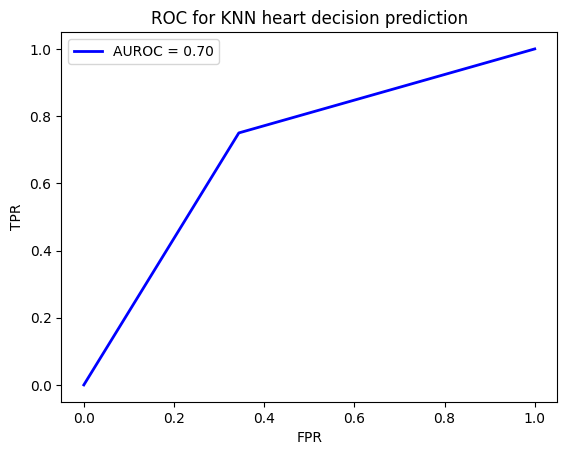

In [169]:
# plot roccurve for knn with k=1
# column 0 is negative class, column 1 is positive class
knn_heart_pos_probs = knn_heart_class_probs[:,1]
fpr, tpr, thresholds = roc_curve(knn_y_heart_test, knn_heart_pos_probs)
auroc = roc_auc_score(knn_y_heart_test, knn_heart_pos_probs)

plt.clf() # clearning plot space
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%auroc)
plt.title('ROC for KNN heart decision prediction')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')

In [170]:
decisiontree = DecisionTree()
dt_X_heart_train, dt_X_heart_test, dt_y_heart_train, dt_y_heart_test = train_test_split(
    X_heart_useful, y_heart_disease, test_size=0.2, shuffle=True)
dt_X_heart_train = np.array(dt_X_heart_train)
dt_X_heart_test = np.array(dt_X_heart_test)
dt_y_heart_train = np.array(dt_y_heart_train)
dt_y_heart_test = np.array(dt_y_heart_test)

In [171]:
dt_heart_probs = decisiontree.fit(dt_X_heart_train, dt_y_heart_train).predict(dt_X_heart_test)

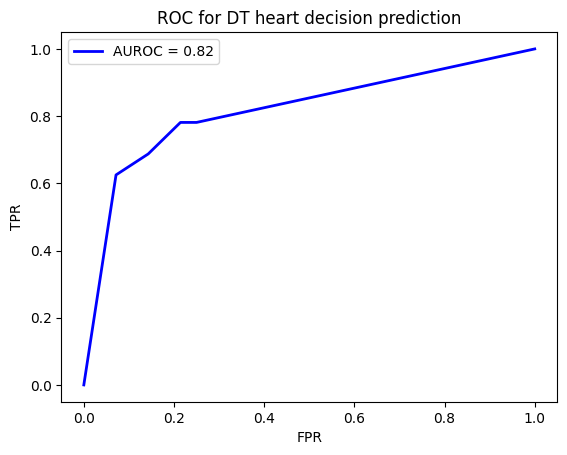

In [172]:
# plot roccurve for dt (default)
# column 0 is negative class, column 1 is positive class
dt_heart_pos_probs = dt_heart_probs[:,1]
fpr, tpr, thresholds = roc_curve(dt_y_heart_test, dt_heart_pos_probs)
auroc = roc_auc_score(dt_y_heart_test, dt_heart_pos_probs)

plt.clf() # clearning plot space
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%auroc)
plt.title('ROC for DT heart decision prediction')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')

In [173]:
# now compare model accuracies on dataset 2
penguins = penguins.drop(['Adelie', 'Chinstrap', 'Gentoo'], axis=1)

Let's get the average accuracy out of the three "subexperiments" (where we label one species as positive and the rest collectively as negative), since our decision tree code only works on numerical data

In [174]:
knn = KNN()

In [175]:
X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
X_penguin_train = np.array(X_penguin_train)
X_penguin_test = np.array(X_penguin_test)
adelie_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Adelie' else 0))
adelie_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Adelie' else 0))
adelie_probs, adelie_knns = knn.fit(X_penguin_train, adelie_pos_train).predict(X_penguin_test)
knn_adelie_preds = (adelie_probs[:,0] < adelie_probs[:,1]).astype(int)
knn_adelie_accuracy = evaluate_acc(knn_adelie_preds, adelie_pos_test)

In [176]:
X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
X_penguin_train = np.array(X_penguin_train)
X_penguin_test = np.array(X_penguin_test)
chinstrap_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Chinstrap' else 0))
chinstrap_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Chinstrap' else 0))
chinstrap_probs, chinstrap_knns = knn.fit(X_penguin_train, chinstrap_pos_train).predict(X_penguin_test)
knn_chinstrap_preds = (chinstrap_probs[:,0] < chinstrap_probs[:,1]).astype(int)
knn_chinstrap_accuracy = evaluate_acc(knn_chinstrap_preds, chinstrap_pos_test)

In [177]:
X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
X_penguin_train = np.array(X_penguin_train)
X_penguin_test = np.array(X_penguin_test)
gentoo_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Gentoo' else 0))
gentoo_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Gentoo' else 0))
gentoo_probs, gentoo_knns = knn.fit(X_penguin_train, gentoo_pos_train).predict(X_penguin_test)
knn_gentoo_preds = (gentoo_probs[:,0] < gentoo_probs[:,1]).astype(int)
knn_gentoo_accuracy = evaluate_acc(knn_gentoo_preds, gentoo_pos_test)

In [178]:
print(f'KNN Adelie accuracy: {knn_adelie_accuracy}')
print(f'KNN Chinstrap accuracy: {knn_chinstrap_accuracy}')
print(f'KNN Gentoo accuracy: {knn_gentoo_accuracy}')
print(f'KNN Averaged accuracy: {np.mean([knn_adelie_accuracy, knn_chinstrap_accuracy, knn_gentoo_accuracy])}')

KNN Adelie accuracy: 1.0
KNN Chinstrap accuracy: 1.0
KNN Gentoo accuracy: 1.0
KNN Averaged accuracy: 1.0


In [179]:
dt = DecisionTree()

In [180]:
X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
X_penguin_train = np.array(X_penguin_train)
X_penguin_test = np.array(X_penguin_test)
adelie_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Adelie' else 0))
adelie_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Adelie' else 0))
adelie_probs = dt.fit(X_penguin_train, adelie_pos_train).predict(X_penguin_test)
dt_adelie_preds = (adelie_probs[:,0] < adelie_probs[:,1]).astype(int)
dt_adelie_accuracy = evaluate_acc(dt_adelie_preds, adelie_pos_test)

In [181]:
X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
X_penguin_train = np.array(X_penguin_train)
X_penguin_test = np.array(X_penguin_test)
chinstrap_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Chinstrap' else 0))
chinstrap_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Chinstrap' else 0))
chinstrap_probs = dt.fit(X_penguin_train, chinstrap_pos_train).predict(X_penguin_test)
dt_chinstrap_preds = (chinstrap_probs[:,0] < chinstrap_probs[:,1]).astype(int)
dt_chinstrap_accuracy = evaluate_acc(dt_chinstrap_preds, chinstrap_pos_test)

In [182]:
X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
X_penguin_train = np.array(X_penguin_train)
X_penguin_test = np.array(X_penguin_test)
gentoo_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Gentoo' else 0))
gentoo_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Gentoo' else 0))
gentop_probs = dt.fit(X_penguin_train, gentoo_pos_train).predict(X_penguin_test)
dt_gentoo_preds = (gentoo_probs[:,0] < gentoo_probs[:,1]).astype(int)
dt_gentoo_accuracy = evaluate_acc(dt_gentoo_preds, gentoo_pos_test)

In [183]:
print(f'DT Adelie accuracy: {dt_adelie_accuracy}')
print(f'DT Chinstrap accuracy: {dt_chinstrap_accuracy}')
print(f'DT Gentoo accuracy: {dt_gentoo_accuracy}')
print(f'DT Averaged accuracy: {np.mean([dt_adelie_accuracy, dt_chinstrap_accuracy, dt_gentoo_accuracy])}')

DT Adelie accuracy: 0.9552238805970149
DT Chinstrap accuracy: 0.835820895522388
DT Gentoo accuracy: 0.4925373134328358
DT Averaged accuracy: 0.7611940298507461


### 2. Investigate how different values for k in KNN influences test/train accuracy in both datasets

We use euclidean distance as a control and measure how accuracy varies as K varies in KNN

In [184]:
# dataset 1
k_accuracy_1 = {}
k_options = range(1, 11)
for n in k_options:
    knn_X_heart_train, knn_X_heart_test, knn_y_heart_train, knn_y_heart_test = train_test_split(
    X_heart_useful, y_heart_disease, test_size=0.2, shuffle=True)
    knn_X_heart_train = np.array(knn_X_heart_train)
    knn_X_heart_test = np.array(knn_X_heart_test)
    knn_y_heart_train = np.array(knn_y_heart_train)
    knn_y_heart_test = np.array(knn_y_heart_test)
    knn = KNN(k=n)
    class_probs_train, knns_train = knn.fit(knn_X_heart_train, knn_y_heart_train).predict(knn_X_heart_train)
    knn_preds_train = (class_probs_train[:,1] > class_probs_train[:,0]).astype(int)
    accuracy_train = evaluate_acc(knn_preds_train, knn_y_heart_train)
    class_probs_test, knns_test = knn.fit(knn_X_heart_train, knn_y_heart_train).predict(knn_X_heart_test)
    knn_preds_test = (class_probs_test[:,1] > class_probs_test[:,0]).astype(int)
    accuracy_test = evaluate_acc(knn_preds_test, knn_y_heart_test)
    k_accuracy_1[n] = [('train', accuracy_train), ('test', accuracy_test)]

In [185]:
k_accuracy_1

{1: [('train', 0.9113924050632911), ('test', 0.7833333333333333)],
 2: [('train', 0.8776371308016878), ('test', 0.75)],
 3: [('train', 0.8649789029535865), ('test', 0.8666666666666667)],
 4: [('train', 0.8860759493670886), ('test', 0.7833333333333333)],
 5: [('train', 0.8523206751054853), ('test', 0.8333333333333334)],
 6: [('train', 0.8734177215189873), ('test', 0.8333333333333334)],
 7: [('train', 0.8649789029535865), ('test', 0.8)],
 8: [('train', 0.8438818565400844), ('test', 0.8833333333333333)],
 9: [('train', 0.8354430379746836), ('test', 0.8333333333333334)],
 10: [('train', 0.8396624472573839), ('test', 0.8166666666666667)]}

In [186]:
k_accuracy_2 = {}
k_options = range(1, 11)
for n in k_options:
    knn = KNN(k=n)
    X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
    X_penguin_train = np.array(X_penguin_train)
    X_penguin_test = np.array(X_penguin_test)
    adelie_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Adelie' else 0))
    adelie_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Adelie' else 0))
    adelie_probs_train, adelie_knns_train = knn.fit(X_penguin_train, adelie_pos_train).predict(X_penguin_train)
    knn_adelie_preds_train = (adelie_probs_train[:,0] < adelie_probs_train[:,1]).astype(int)
    knn_adelie_accuracy_train = evaluate_acc(knn_adelie_preds_train, adelie_pos_train)
    adelie_probs_test, adelie_knns_test = knn.fit(X_penguin_train, adelie_pos_train).predict(X_penguin_test)
    knn_adelie_preds_test = (adelie_probs_test[:,0] < adelie_probs_test[:,1]).astype(int)
    knn_adelie_accuracy_test = evaluate_acc(knn_adelie_preds_test, adelie_pos_test)
    
    knn = KNN(k=n)
    X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
    X_penguin_train = np.array(X_penguin_train)
    X_penguin_test = np.array(X_penguin_test)
    chinstrap_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Chinstrap' else 0))
    chinstrap_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Chinstrap' else 0))
    chinstrap_probs_train, chinstrap_knns_train = knn.fit(X_penguin_train, chinstrap_pos_train).predict(X_penguin_train)
    knn_chinstrap_preds_train = (chinstrap_probs_train[:,0] < chinstrap_probs_train[:,1]).astype(int)
    knn_chinstrap_accuracy_train = evaluate_acc(knn_chinstrap_preds_train, chinstrap_pos_train)
    chinstrap_probs_test, chinstrap_knns_test = knn.fit(X_penguin_train, chinstrap_pos_train).predict(X_penguin_test)
    knn_chinstrap_preds_test = (chinstrap_probs_test[:,0] < chinstrap_probs_test[:,1]).astype(int)
    knn_chinstrap_accuracy_test = evaluate_acc(knn_chinstrap_preds_test, chinstrap_pos_test)
    
    knn = KNN(k=n)
    X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
    X_penguin_train = np.array(X_penguin_train)
    X_penguin_test = np.array(X_penguin_test)
    gentoo_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Gentoo' else 0))
    gentoo_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Gentoo' else 0))
    gentoo_probs_train, gentoo_knns_train = knn.fit(X_penguin_train, gentoo_pos_train).predict(X_penguin_train)
    knn_gentoo_preds_train = (gentoo_probs_train[:,0] < gentoo_probs_train[:,1]).astype(int)
    knn_gentoo_accuracy_train = evaluate_acc(knn_gentoo_preds_train, gentoo_pos_train)
    gentoo_probs_test, gentoo_knns_test = knn.fit(X_penguin_train, gentoo_pos_train).predict(X_penguin_test)
    knn_gentoo_preds_test = (gentoo_probs_test[:,0] < gentoo_probs_test[:,1]).astype(int)
    knn_gentoo_accuracy_test = evaluate_acc(knn_gentoo_preds_test, gentoo_pos_test)
    
    overall_train_acc = np.mean([knn_adelie_accuracy_train, knn_chinstrap_accuracy_train, knn_gentoo_accuracy_train])
    overall_test_acc = np.mean([knn_adelie_accuracy_test, knn_chinstrap_accuracy_test, knn_gentoo_accuracy_test])
    k_accuracy_2[n] = [('Train', overall_train_acc), ('Test', overall_test_acc)]

In [187]:
k_accuracy_2

{1: [('Train', 1.0), ('Test', 1.0)],
 2: [('Train', 1.0), ('Test', 1.0)],
 3: [('Train', 0.9987515605493135), ('Test', 1.0)],
 4: [('Train', 1.0), ('Test', 0.990049751243781)],
 5: [('Train', 0.9975031210986267), ('Test', 0.9950248756218905)],
 6: [('Train', 0.9975031210986267), ('Test', 0.9850746268656717)],
 7: [('Train', 0.9937578027465669), ('Test', 0.990049751243781)],
 8: [('Train', 0.99625468164794), ('Test', 0.990049751243781)],
 9: [('Train', 0.9937578027465669), ('Test', 1.0)],
 10: [('Train', 0.9937578027465669), ('Test', 1.0)]}

## 3. Investigate how various max tree depths affect DT model performance

In [188]:
dt_accuracy_1 = {}
depths = range(3,9)
for depth in depths:
    dt_X_heart_train, dt_X_heart_test, dt_y_heart_train, dt_y_heart_test = train_test_split(
    X_heart_useful, y_heart_disease, test_size=0.2, shuffle=True)
    dt_X_heart_train = np.array(dt_X_heart_train)
    dt_X_heart_test = np.array(dt_X_heart_test)
    dt_y_heart_train = np.array(dt_y_heart_train)
    dt_y_heart_test = np.array(dt_y_heart_test)
    dt = DecisionTree(max_depth=depth)
    class_probs_train = dt.fit(dt_X_heart_train, dt_y_heart_train).predict(dt_X_heart_train)
    dt_preds_train = (class_probs_train[:,1] > class_probs_train[:,0]).astype(int)
    accuracy_train = evaluate_acc(dt_preds_train, dt_y_heart_train)
    class_probs_test = dt.fit(dt_X_heart_train, dt_y_heart_train).predict(dt_X_heart_test)
    dt_preds_test = (class_probs_test[:,1] > class_probs_test[:,0]).astype(int)
    accuracy_test = evaluate_acc(dt_preds_test, dt_y_heart_test)
    dt_accuracy_1[depth] = [('train', accuracy_train), ('test', accuracy_test)]

In [189]:
dt_accuracy_1

{3: [('train', 0.8185654008438819), ('test', 0.85)],
 4: [('train', 0.8396624472573839), ('test', 0.8)],
 5: [('train', 0.869198312236287), ('test', 0.7666666666666667)],
 6: [('train', 0.890295358649789), ('test', 0.8)],
 7: [('train', 0.9029535864978903), ('test', 0.75)],
 8: [('train', 0.9156118143459916), ('test', 0.7166666666666667)]}

In [190]:
dt_accuracy_2 = {}
depths = range(3,9)
for depth in depths:
    dt = DecisionTree(max_depth=depth)
    X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
    X_penguin_train = np.array(X_penguin_train)
    X_penguin_test = np.array(X_penguin_test)
    adelie_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Adelie' else 0))
    adelie_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Adelie' else 0))
    adelie_probs_train = dt.fit(X_penguin_train, adelie_pos_train).predict(X_penguin_train)
    dt_adelie_preds_train = (adelie_probs_train[:,0] < adelie_probs_train[:,1]).astype(int)
    dt_adelie_accuracy_train = evaluate_acc(dt_adelie_preds_train, adelie_pos_train)
    adelie_probs_test = dt.fit(X_penguin_train, adelie_pos_train).predict(X_penguin_test)
    dt_adelie_preds_test = (adelie_probs_test[:,0] < adelie_probs_test[:,1]).astype(int)
    dt_adelie_accuracy_test = evaluate_acc(dt_adelie_preds_test, adelie_pos_test)
    
    dt = DecisionTree(max_depth=depth)
    X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
    X_penguin_train = np.array(X_penguin_train)
    X_penguin_test = np.array(X_penguin_test)
    chinstrap_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Chinstrap' else 0))
    chinstrap_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Chinstrap' else 0))
    chinstrap_probs_train = dt.fit(X_penguin_train, chinstrap_pos_train).predict(X_penguin_train)
    dt_chinstrap_preds_train = (chinstrap_probs_train[:,0] < chinstrap_probs_train[:,1]).astype(int)
    dt_chinstrap_accuracy_train = evaluate_acc(dt_chinstrap_preds_train, chinstrap_pos_train)
    chinstrap_probs_test = dt.fit(X_penguin_train, chinstrap_pos_train).predict(X_penguin_test)
    dt_chinstrap_preds_test = (chinstrap_probs_test[:,0] < chinstrap_probs_test[:,1]).astype(int)
    dt_chinstrap_accuracy_test = evaluate_acc(dt_chinstrap_preds_test, chinstrap_pos_test)
    
    dt = DecisionTree(max_depth=depth)
    X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
    X_penguin_train = np.array(X_penguin_train)
    X_penguin_test = np.array(X_penguin_test)
    gentoo_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Gentoo' else 0))
    gentoo_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Gentoo' else 0))
    gentoo_probs_train = dt.fit(X_penguin_train, gentoo_pos_train).predict(X_penguin_train)
    dt_gentoo_preds_train = (gentoo_probs_train[:,0] < gentoo_probs_train[:,1]).astype(int)
    dt_gentoo_accuracy_train = evaluate_acc(dt_gentoo_preds_train, gentoo_pos_train)
    gentoo_probs_test = dt.fit(X_penguin_train, gentoo_pos_train).predict(X_penguin_test)
    dt_gentoo_preds_test = (gentoo_probs_test[:,0] < gentoo_probs_test[:,1]).astype(int)
    dt_gentoo_accuracy_test = evaluate_acc(dt_gentoo_preds_test, gentoo_pos_test)
    
    overall_train_acc = np.mean([dt_adelie_accuracy_train, dt_chinstrap_accuracy_train, dt_gentoo_accuracy_train])
    overall_test_acc = np.mean([dt_adelie_accuracy_test, dt_chinstrap_accuracy_test, dt_gentoo_accuracy_test])
    dt_accuracy_2[depth] = [('Train', overall_train_acc), ('Test', overall_test_acc)]

In [191]:
dt_accuracy_2

{3: [('Train', 0.9525593008739076), ('Test', 0.9054726368159205)],
 4: [('Train', 0.968789013732834), ('Test', 0.9751243781094527)],
 5: [('Train', 0.9700374531835205), ('Test', 0.9601990049751244)],
 6: [('Train', 0.9925093632958801), ('Test', 0.9800995024875622)],
 7: [('Train', 0.9950062421972534), ('Test', 0.9751243781094527)],
 8: [('Train', 0.9900124843945068), ('Test', 0.9800995024875622)]}

## 4. Try different cost/distance functions for each model

We 'default' the k value for KNN, as well as the max_depth value for DT, in order to achieve consistency

In [192]:
distances = [euclidean, manhattan, hamming, 'gower']
distance_names = ['euclidean', 'manhattan', 'hamming', 'gower']
distance_knn_acc = {}
for idx, d in enumerate(distances):
    knn = KNN(distance_func=d)
    knn_X_heart_train, knn_X_heart_test, knn_y_heart_train, knn_y_heart_test = train_test_split(
    X_heart_useful, y_heart_disease, test_size=0.2, shuffle=True)
    knn_X_heart_train = np.array(knn_X_heart_train)
    knn_X_heart_test = np.array(knn_X_heart_test)
    knn_y_heart_train = np.array(knn_y_heart_train)
    knn_y_heart_test = np.array(knn_y_heart_test)
    class_probs_train, knns_train = knn.fit(knn_X_heart_train, knn_y_heart_train).predict(knn_X_heart_train)
    knn_preds_train = (class_probs_train[:,1] > class_probs_train[:,0]).astype(int)
    accuracy_train = evaluate_acc(knn_preds_train, knn_y_heart_train)
    class_probs_test, knns_test = knn.fit(knn_X_heart_train, knn_y_heart_train).predict(knn_X_heart_test)
    knn_preds_test = (class_probs_test[:,1] > class_probs_test[:,0]).astype(int)
    accuracy_test = evaluate_acc(knn_preds_test, knn_y_heart_test)
    distance_knn_acc[distance_names[idx]] = [('train', accuracy_train), ('test', accuracy_test)]

In [193]:
distance_knn_acc

{'euclidean': [('train', 0.9451476793248945), ('test', 0.7666666666666667)],
 'manhattan': [('train', 0.9029535864978903), ('test', 0.7833333333333333)],
 'hamming': [('train', 0.9367088607594937), ('test', 0.8166666666666667)],
 'gower': [('train', 0.919831223628692), ('test', 0.48333333333333334)]}

In [194]:
costs = [misclassification_rate, cost_entropy, cost_gini_index]
cost_dt_acc = {}
for cost_func in costs:
    dt = DecisionTree(cost_fn=cost_func)
    dt_X_heart_train, dt_X_heart_test, dt_y_heart_train, dt_y_heart_test = train_test_split(
    X_heart_useful, y_heart_disease, test_size=0.2, shuffle=True)
    dt_X_heart_train = np.array(dt_X_heart_train)
    dt_X_heart_test = np.array(dt_X_heart_test)
    dt_y_heart_train = np.array(dt_y_heart_train)
    dt_y_heart_test = np.array(dt_y_heart_test)
    class_probs_train = dt.fit(dt_X_heart_train, dt_y_heart_train).predict(dt_X_heart_train)
    dt_preds_train = (class_probs_train[:,1] > class_probs_train[:,0]).astype(int)
    accuracy_train = evaluate_acc(dt_preds_train, dt_y_heart_train)
    class_probs_test = dt.fit(dt_X_heart_train, dt_y_heart_train).predict(dt_X_heart_test)
    dt_preds_test = (class_probs_test[:,1] > class_probs_test[:,0]).astype(int)
    accuracy_test = evaluate_acc(dt_preds_test, dt_y_heart_test)
    cost_dt_acc[cost_func.__name__] = [('train', accuracy_train), ('test', accuracy_test)]

In [195]:
cost_dt_acc

{'misclassification_rate': [('train', 0.869198312236287),
  ('test', 0.7166666666666667)],
 'cost_entropy': [('train', 0.8438818565400844), ('test', 0.8666666666666667)],
 'cost_gini_index': [('train', 0.869198312236287),
  ('test', 0.7666666666666667)]}

In [196]:
costs = [misclassification_rate, cost_entropy, cost_gini_index]
dt_cost_accuracy_2 = {}
for cost in costs:
    dt = DecisionTree(cost_fn=cost)
    X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
    X_penguin_train = np.array(X_penguin_train)
    X_penguin_test = np.array(X_penguin_test)
    adelie_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Adelie' else 0))
    adelie_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Adelie' else 0))
    adelie_probs_train = dt.fit(X_penguin_train, adelie_pos_train).predict(X_penguin_train)
    dt_adelie_preds_train = (adelie_probs_train[:,0] < adelie_probs_train[:,1]).astype(int)
    dt_adelie_accuracy_train = evaluate_acc(dt_adelie_preds_train, adelie_pos_train)
    adelie_probs_test = dt.fit(X_penguin_train, adelie_pos_train).predict(X_penguin_test)
    dt_adelie_preds_test = (adelie_probs_test[:,0] < adelie_probs_test[:,1]).astype(int)
    dt_adelie_accuracy_test = evaluate_acc(dt_adelie_preds_test, adelie_pos_test)
    
    dt = DecisionTree(cost_fn=cost)
    X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
    X_penguin_train = np.array(X_penguin_train)
    X_penguin_test = np.array(X_penguin_test)
    chinstrap_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Chinstrap' else 0))
    chinstrap_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Chinstrap' else 0))
    chinstrap_probs_train = dt.fit(X_penguin_train, chinstrap_pos_train).predict(X_penguin_train)
    dt_chinstrap_preds_train = (chinstrap_probs_train[:,0] < chinstrap_probs_train[:,1]).astype(int)
    dt_chinstrap_accuracy_train = evaluate_acc(dt_chinstrap_preds_train, chinstrap_pos_train)
    chinstrap_probs_test = dt.fit(X_penguin_train, chinstrap_pos_train).predict(X_penguin_test)
    dt_chinstrap_preds_test = (chinstrap_probs_test[:,0] < chinstrap_probs_test[:,1]).astype(int)
    dt_chinstrap_accuracy_test = evaluate_acc(dt_chinstrap_preds_test, chinstrap_pos_test)
    
    dt = DecisionTree(cost_fn=cost)
    X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = train_test_split(
    penguins, penguins_labels, test_size=0.2, shuffle=True)
    X_penguin_train = np.array(X_penguin_train)
    X_penguin_test = np.array(X_penguin_test)
    gentoo_pos_train = np.array(y_penguin_train.apply(lambda species: 1 if species == 'Gentoo' else 0))
    gentoo_pos_test = np.array(y_penguin_test.apply(lambda species: 1 if species == 'Gentoo' else 0))
    gentoo_probs_train = dt.fit(X_penguin_train, gentoo_pos_train).predict(X_penguin_train)
    dt_gentoo_preds_train = (gentoo_probs_train[:,0] < gentoo_probs_train[:,1]).astype(int)
    dt_gentoo_accuracy_train = evaluate_acc(dt_gentoo_preds_train, gentoo_pos_train)
    gentoo_probs_test = dt.fit(X_penguin_train, gentoo_pos_train).predict(X_penguin_test)
    dt_gentoo_preds_test = (gentoo_probs_test[:,0] < gentoo_probs_test[:,1]).astype(int)
    dt_gentoo_accuracy_test = evaluate_acc(dt_gentoo_preds_test, gentoo_pos_test)
    
    overall_train_acc = np.mean([dt_adelie_accuracy_train, dt_chinstrap_accuracy_train, dt_gentoo_accuracy_train])
    overall_test_acc = np.mean([dt_adelie_accuracy_test, dt_chinstrap_accuracy_test, dt_gentoo_accuracy_test])
    dt_cost_accuracy_2[cost.__name__] = [('Train', overall_train_acc), ('Test', overall_test_acc)]

In [197]:
dt_cost_accuracy_2

{'misclassification_rate': [('Train', 0.9500624219725343),
  ('Test', 0.9552238805970149)],
 'cost_entropy': [('Train', 0.9875156054931336), ('Test', 0.9751243781094527)],
 'cost_gini_index': [('Train', 0.9937578027465669),
  ('Test', 0.9601990049751244)]}

### 5. AUROC for KNN vs DT on test data (dataset 1)

From our experiments above, we can get a feel for what combination of parameters might give us the best results. For KNN, k=4 seems to be the most performant of the neighbour values, and euclidean distance seems to be the most performant distance function. For Decision Tree, gini index is the most performant cost function, and a max depth of 8 seems to be the best performing. (These results are on average and may vary from run to run)

In [202]:
knn = KNN(k=4, distance_func=euclidean)
dt = DecisionTree(max_depth=8, cost_fn=cost_gini_index)
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(
    X_heart_useful, y_heart_disease, test_size=0.2, shuffle=True)

X_heart_train = np.array(X_heart_train)
X_heart_test = np.array(X_heart_test)
y_heart_train = np.array(y_heart_train)
y_heart_test = np.array(y_heart_test)

In [205]:
# now fit and generate predictions for both classifiers
knn_class_probs, knns = knn.fit(X_heart_train, y_heart_train).predict(X_heart_test)
dt_class_probs = dt.fit(X_heart_train, y_heart_train).predict(X_heart_test)

knn_class_pos_probs = knn_class_probs[:,1]
dt_class_pos_probs = dt_class_probs[:,1]
fpr_knn, tpr_knn, knn_thresholds = roc_curve(y_heart_test, knn_class_pos_probs)
fpr_dt, tpr_dt, dt_thresholds = roc_curve(y_heart_test, dt_class_pos_probs)
roc_knn = roc_auc_score(y_heart_test, knn_class_pos_probs)
roc_dt = roc_auc_score(y_heart_test, dt_class_pos_probs)

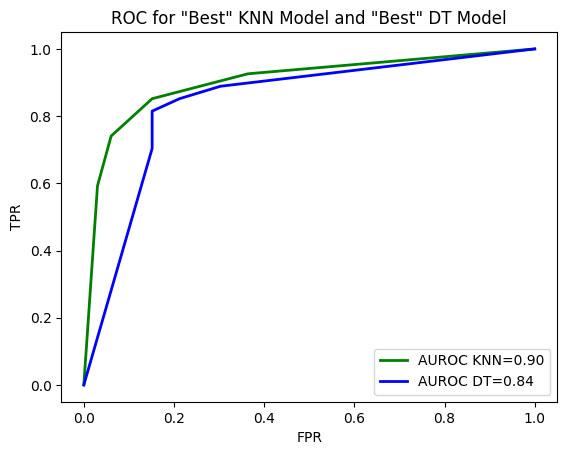

In [208]:
plt.clf()
plt.plot(fpr_knn, tpr_knn, 'g', linewidth=2, label=f'AUROC KNN={roc_knn:.2f}')
plt.plot(fpr_dt, tpr_dt, 'b', linewidth=2, label=f'AUROC DT={roc_dt:.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for "Best" KNN Model and "Best" DT Model')
plt.legend(loc='best')

### 7. Rough feature importance score

In [224]:
def compute_feature_importance(self, fts):
        feature_counts = {ft: 0 for ft in fts}

        def traverse(node):
            if node is None or not hasattr(node, 'split_feature'):
                # test if a node has children
                # can also do if node.left or node.right
                return
            if node.split_feature is not None:
                feature_counts[fts[node.split_feature]] += 1
            traverse(node.left)
            traverse(node.right)
        traverse(self.root)

        return feature_counts
    
DecisionTree.compute_feature_importance = compute_feature_importance

In [230]:
# let's fit a classifier on each dataset and count the total frequency of each feature visited over both datasets
dt = DecisionTree(max_depth=8, cost_fn=cost_gini_index)
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(
    X_heart_useful, y_heart_disease, test_size=0.2, shuffle=True)

X_heart_train = np.array(X_heart_train)
X_heart_test = np.array(X_heart_test)
y_heart_train = np.array(y_heart_train)
y_heart_test = np.array(y_heart_test)

dt.fit(X_heart_train, y_heart_train).predict(X_heart_test)
dt.compute_feature_importance([*X_heart_useful])

{'sex': 11,
 'cp': 26,
 'restecg': 25,
 'exang': 11,
 'slope': 22,
 'ca': 9,
 'thal': 2}